In [1]:
import torch
from torch.utils.data import DataLoader
# transforms用于执行数据变换
from torchvision import datasets, transforms
import os
from pathlib import Path
import random
from PIL import Image

In [2]:
# 设置文件夹路径
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

In [3]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")  

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# 设置训练和测试路径
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [6]:
# 设置种子
random.seed(42) # 可以修改
# 获得所有图片的路径
image_path_list = list(image_path.glob("*/*/*.jpg"))
# 获得随机图片的路径
random_image_path = random.choice(image_path_list)
# 从路径名中获得图片类别名
image_class = random_image_path.parent.stem
# 打开图片
img = Image.open(random_image_path)
# 打印图片数据
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")

Random image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


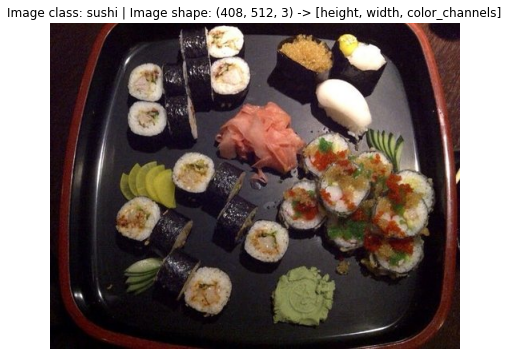

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# 图像转化为数组
img_as_array = np.asarray(img)
# 用matplotlib绘制
plt.figure(figsize=(8,6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [8]:
# 定义对图像的变换
data_transform = transforms.Compose([
    # 对图像进行指定大小的Resize
    transforms.Resize(size=(64, 64)),
    # 按概率对图像进行水平翻转，增强泛化能力
    transforms.RandomHorizontalFlip(p=0.5), 
    # 将图像转成张量形式
    transforms.ToTensor()
])

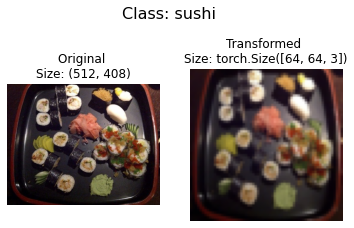

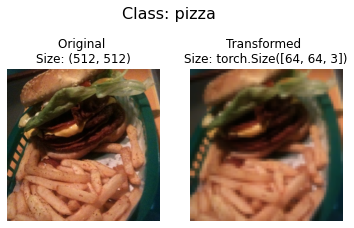

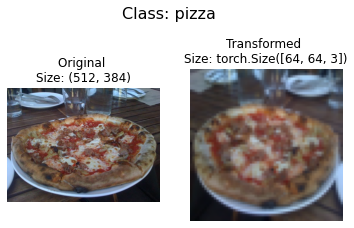

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [10]:
train_dir

WindowsPath('data/pizza_steak_sushi/train')

In [11]:
# 使用ImageFolder构建数据集
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # 训练数据文件夹
                                  transform=data_transform, # 对数据进行指定形式的变换
                                  target_transform=None) # 不对标签进行变换
test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

In [12]:
# 将训练集和测试集转至DataLoaders，便于后续训练
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)